# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [46]:
# # Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?"

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1
# city = 'port mathurin'
# city_url = f"{url}q={city}&appid={weather_api_key}" # YOUR CODE HERE
# res = requests.get(city_url).json()
#         # Parse the JSON and retrieve data
# city_weather = res['weather'][0]['description']

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
# city_lat = res['coord']['lat']
# city_lng = res['coord']['lon']
# city_max_temp = res['main']['temp_max']
# city_humidity = res['main']['humidity']
# city_clouds = res['clouds']['all']
# city_wind = res['wind']['speed']
# city_country = res['sys']['country']
# city_date = res['dt']


#         # Append the City information into city_data list
# city_data.append({"City": city, 
#         "Lat": city_lat, 
#         "Lng": city_lng, 
#         "Max Temp": city_max_temp,
#         "Humidity": city_humidity,
#         "Cloudiness": city_clouds,
#         "Wind Speed": city_wind,
#         "Country": city_country,
#         "Date": city_date})

# print (res)
# print(city_data)
# city_data_df = pd.DataFrame(city_data)
# city_data_df.head()


Beginning Data Retrieval     
-----------------------------
{'coord': {'lon': 63.4167, 'lat': -19.6833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.84, 'feels_like': 301.92, 'temp_min': 299.84, 'temp_max': 299.84, 'pressure': 1014, 'humidity': 76, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.97, 'deg': 63, 'gust': 5.21}, 'rain': {'1h': 0.12}, 'clouds': {'all': 9}, 'dt': 1712879423, 'sys': {'country': 'MU', 'sunrise': 1712886956, 'sunset': 1712929065}, 'timezone': 14400, 'id': 1545752, 'name': 'Port Mathurin', 'cod': 200}
[{'City': 'port mathurin', 'Lat': -19.6833, 'Lng': 63.4167, 'Max Temp': 299.84, 'Humidity': 76, 'Cloudiness': 9, 'Wind Speed': 4.97, 'Country': 'MU', 'Date': 1712879423}]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,299.84,76,9,4.97,MU,1712879423


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        res = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather = res['weather'][0]['description']       
        city_lat = res['coord']['lat']
        city_lng = res['coord']['lon']
        city_max_temp = res['main']['temp_max']
        city_humidity = res['main']['humidity']
        city_clouds = res['clouds']['all']
        city_wind = res['wind']['speed']
        city_country = res['sys']['country']
        city_date = res['dt']
  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | calingasta
Processing Record 8 of Set 1 | charlottetown
Processing Record 9 of Set 1 | black river
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | fort bragg
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | santa cruz cabralia
Processing Record 17 of Set 1 | sampit
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | rio grande
Processing Record 21 of Set 1 | ust

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,301.92,71,100,2.34,MV,1712879633
1,atafu village,-8.5421,-172.5159,302.80,75,39,3.60,TK,1712879633
2,puerto ayora,-0.7393,-90.3518,299.01,98,64,2.68,EC,1712879633
3,blackmans bay,-43.0167,147.3167,287.33,69,84,3.77,AU,1712879633
4,ushuaia,-54.8000,-68.3000,280.96,66,0,11.83,AR,1712879387


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,301.92,71,100,2.34,MV,1712879633
1,atafu village,-8.5421,-172.5159,302.80,75,39,3.60,TK,1712879633
2,puerto ayora,-0.7393,-90.3518,299.01,98,64,2.68,EC,1712879633
3,blackmans bay,-43.0167,147.3167,287.33,69,84,3.77,AU,1712879633
4,ushuaia,-54.8000,-68.3000,280.96,66,0,11.83,AR,1712879387


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

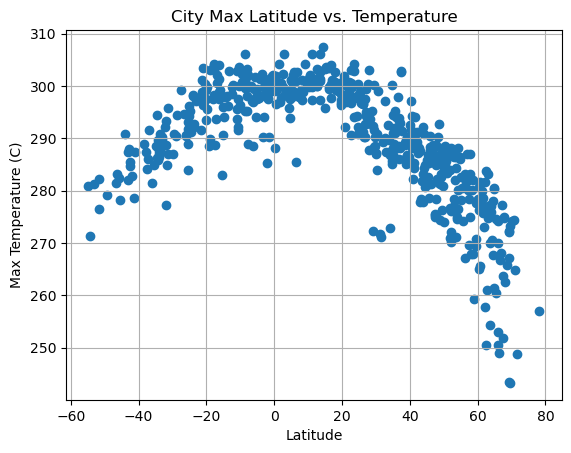

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o")
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2024-04-11)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

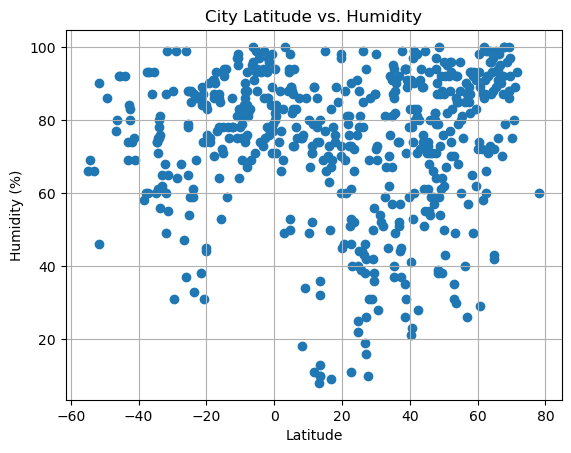

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-11)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

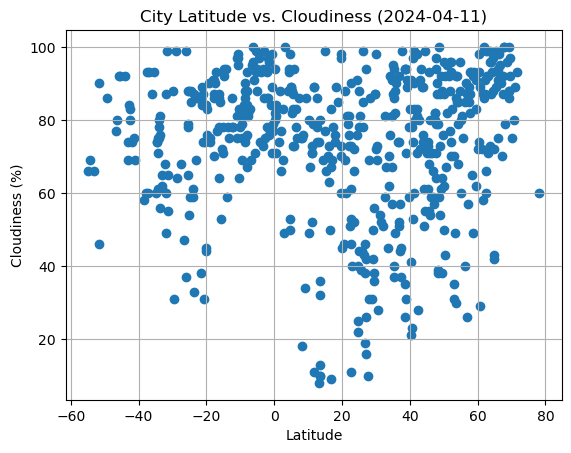

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-11)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

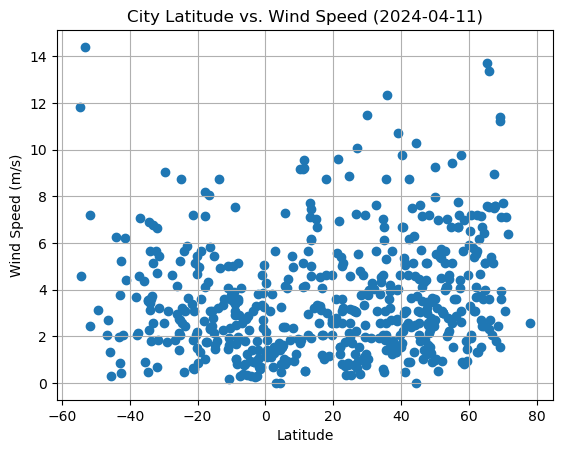

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-11)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_values = census_data_complete["Poverty Rate"].astype("float")
y_values = census_data_complete["Bank Count"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


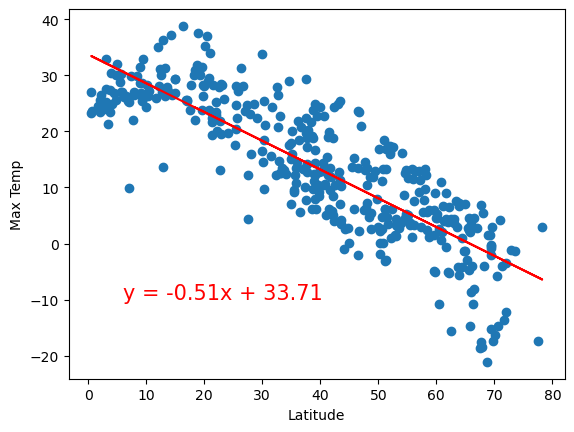

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


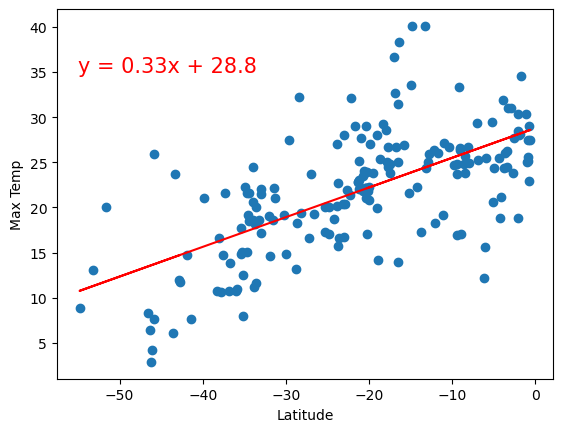

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


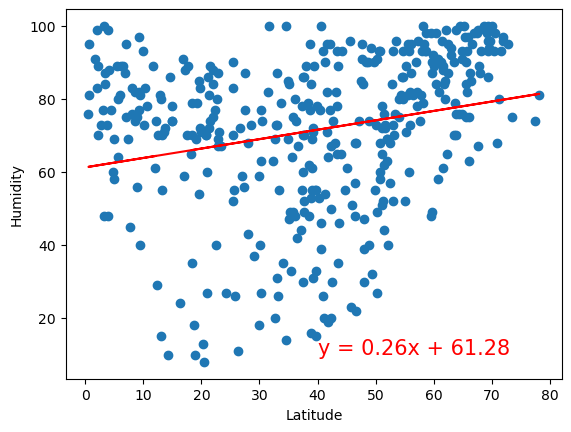

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


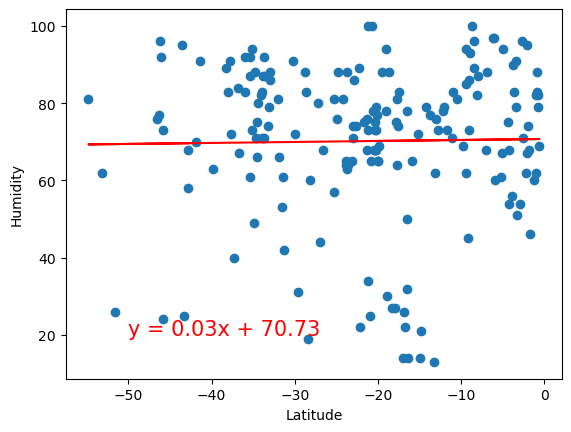

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


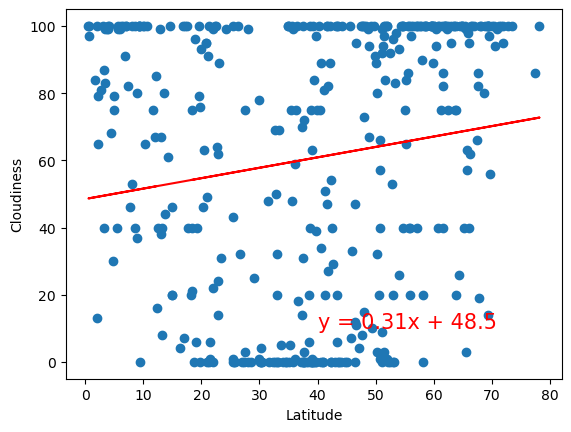

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


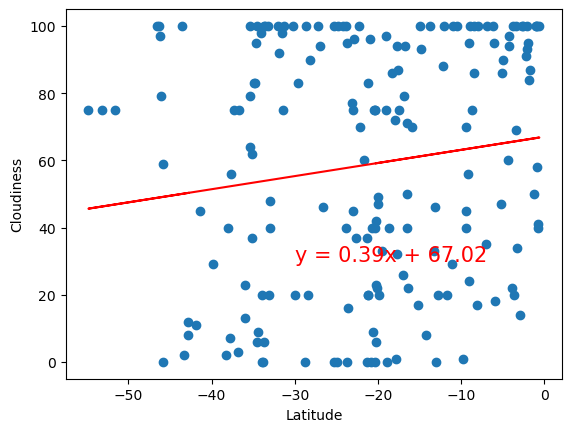

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


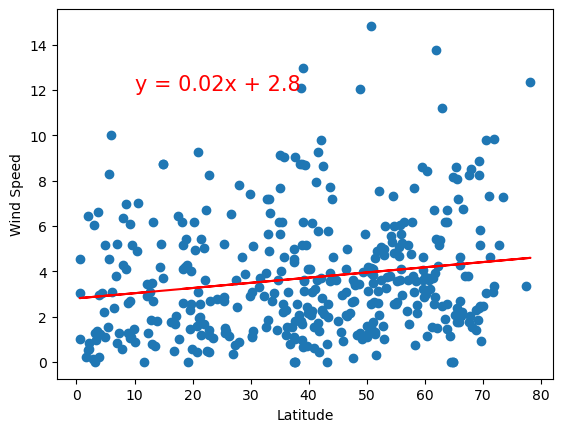

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


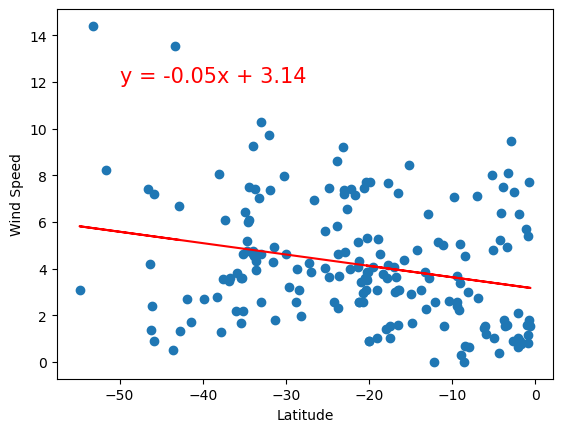

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE